In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna # for hyperparameter optimization
from fitter import Fitter
warnings.filterwarnings('ignore')


c:\Users\Latte\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('autodata.csv')
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [3]:
#this report show us correlation matrix, many plots and more, zero values, null values, high correlation, high cardinality, etc.

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("report.html")

In [4]:
# profile

In [5]:
frq = df["CLM_FREQ"].sum() / df["ID"].count()
frq

0.8007183071248302

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [7]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [8]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace("$","")
    try:
        df[i] = df[i].astype(float)
    except:
        pass

In [9]:
df = df.drop(["ID","CLM_AMT"],axis=1)

In [10]:
#we split before encoding because we apply target encoding
X = df.drop(["CLAIM_FLAG"],axis=1)
y = df["CLAIM_FLAG"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43,stratify=df.CLAIM_FLAG)

In [12]:
y_train_sum = y_train.sum()
y_train_len = len(y_train)
y_train_oran = y_train_sum / y_train_len

print(f"Ratio of 1 in y_train: {y_train_oran:0.2%}")

y_test_sum = y_test.sum()
y_test_len = len(y_test)
y_test_oran = y_test_sum / y_test_len

print(f"Ratio of 1 in y_test: {y_test_oran:0.2%}")

Ratio of 1 in y_train: 26.66%
Ratio of 1 in y_test: 26.64%


In [13]:
#target encoding
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

In [14]:
X_train_encoded.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE
1457,0.0,52.0,0.0,5.0,0.231908,0.238785,0.363052,0.334652,0.275800,0.236692,...,0.217949,0.262753,1.0,0.345679,0.268786,0.231908,1.0,0.240648,0.0,10.0
6291,0.0,43.0,0.0,0.0,0.390698,0.238785,0.363052,0.334652,0.275800,0.346598,...,0.217949,0.231908,1.0,0.290591,0.268786,0.181349,0.0,0.240648,1.0,6.0
4451,0.0,62.0,0.0,12.0,0.231908,0.238785,0.231908,0.221437,0.275800,0.166441,...,0.217949,0.231908,17.0,0.345679,0.268786,0.231908,3.0,0.240648,0.0,19.0
1698,0.0,47.0,0.0,10.0,0.299703,0.238785,0.363052,0.334652,0.255851,0.196633,...,0.350912,0.263806,1.0,0.281633,0.261128,0.181349,0.0,0.240648,2.0,9.0
4660,0.0,53.0,0.0,13.0,0.231908,0.238785,0.363052,0.221437,0.255851,0.236692,...,0.350912,0.279796,1.0,0.313210,0.261128,0.181349,0.0,0.240648,0.0,1.0


In [15]:
# Create a list of models
models = [xgb.XGBClassifier()]

# Create a function to fit and score models
def fit_and_score(X_train, y_train):

    # Dictionary to store results
    results = {}

    # Loop through models
    for model in models:
        # Create cross-validation object
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

        # Store results
        results[str(model).split('(')[0]] = cv


    return results

# Store results in a dataframe
df_cv2 = pd.DataFrame(fit_and_score(X_train_encoded, y_train))

[15:23:59] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:00] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:00] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:00] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\s

In [16]:
#we realize that model is overfitting
df_cv2

,XGBClassifier
0,0.970455
1,0.977221
2,0.956720
3,0.968109
4,0.970455


In [17]:
#xgb model
xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train_encoded, y_train)
y_pred = xgb_model.predict(X_test_encoded)

[15:24:01] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1512
         1.0       0.37      0.15      0.22       549

    accuracy                           0.70      2061
   macro avg       0.56      0.53      0.52      2061
weighted avg       0.65      0.70      0.66      2061



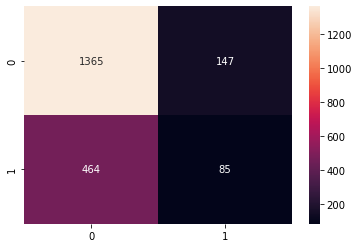

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

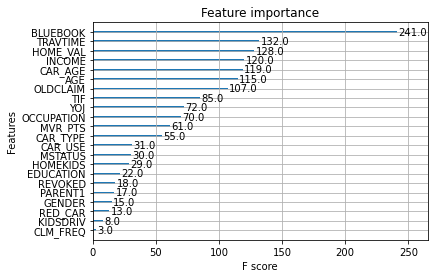

In [19]:
#so because of this and domaing knowledge we will drop clm_amt column in above
plot_importance(xgb_model)

In [20]:
#creatin roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotly ile ROC Curve oluşturma
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    line=dict(color='darkorange', width=2)))
fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  showlegend=False)
fig.show()

In [21]:
pred = xgb_model.predict_proba(X_test_encoded)
pred

array([[9.9566013e-01, 4.3398552e-03],
       [3.0693036e-01, 6.9306964e-01],
       [9.9946821e-01, 5.3176784e-04],
       ...,
       [9.9918944e-01, 8.1053562e-04],
       [9.9231124e-01, 7.6887719e-03],
       [9.7150820e-01, 2.8491816e-02]], dtype=float32)

In [22]:
treshold = 0.6

lst = []
lst_prob = []

for i in range(len(pred)):
    if pred[i][0] >= treshold:
        lst.append(0)
        lst_prob.append(pred[i][0])
    else:
        lst.append(1)
        lst_prob.append(pred[i][1])


              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1512
         1.0       0.36      0.17      0.23       549

    accuracy                           0.70      2061
   macro avg       0.56      0.53      0.52      2061
weighted avg       0.65      0.70      0.66      2061



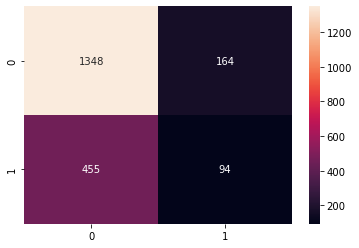

In [23]:
cm = confusion_matrix(y_test, lst)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, lst))


In [24]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_encoded)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred)
    return f1score

In [25]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-29 15:24:03,776] A new study created in memory with name: no-name-b429cbf2-6d2b-44ee-8f04-02a296b487a1
[I 2023-04-29 15:24:05,083] Trial 0 finished with value: 0.23448275862068962 and parameters: {'max_depth': 6, 'learning_rate': 0.030216610203342216, 'n_estimators': 367, 'min_child_weight': 1, 'gamma': 0.00010246538256613856, 'subsample': 0.02598484305945086, 'colsample_bytree': 0.30754969981793256, 'reg_alpha': 9.924401806949089e-08, 'reg_lambda': 0.0003556120737191238}. Best is trial 0 with value: 0.23448275862068962.
[I 2023-04-29 15:24:05,957] Trial 1 finished with value: 0.25034387895460797 and parameters: {'max_depth': 3, 'learning_rate': 0.023733350594504758, 'n_estimators': 289, 'min_child_weight': 5, 'gamma': 0.005950176881686887, 'subsample': 0.13341986241780018, 'colsample_bytree': 0.125552962356385, 'reg_alpha': 0.00022448237082127204, 'reg_lambda': 0.12633743940623254}. Best is trial 1 with value: 0.25034387895460797.
[I 2023-04-29 15:24:06,709] Trial 2 finishe

Number of finished trials: 20
Best trial:
  Value: 0.330749354005168
  Params: 
    max_depth: 1
    learning_rate: 0.12653218644651276
    n_estimators: 481
    min_child_weight: 10
    gamma: 0.006025367838617817
    subsample: 0.7536723777646523
    colsample_bytree: 0.011639721845005987
    reg_alpha: 2.8939804193100085e-06
    reg_lambda: 1.3792676589044589e-06


In [26]:
###

In [27]:
df = pd.read_csv('autodata.csv')
df.head()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace("$","")
        df[i] = df[i].str.replace("$","")
    try:
        df[i] = df[i].astype(float)
    except:
        pass

In [28]:
df_frq = df.groupby("ID").agg({"CLAIM_FLAG":"sum","KIDSDRIV":"count"}).reset_index()

In [29]:
df_frq["FRQ"] = df_frq.CLAIM_FLAG / df_frq.KIDSDRIV
df2 = df.merge(df_frq, on="ID", how="left")
df2.head()

,ID,KIDSDRIV_x,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG_x,CLAIM_FLAG_y,KIDSDRIV_y,FRQ
0,63581743.0,0.0,60.0,0.0,11.0,"67,349",No,0,z_No,M,...,"4,461",2.0,No,3.0,0,18.0,0.0,0.0,1,0.0
1,132761049.0,0.0,43.0,0.0,11.0,"91,449",No,"257,252",z_No,M,...,0,0.0,No,0.0,0,1.0,0.0,0.0,1,0.0
2,921317019.0,0.0,48.0,0.0,11.0,"52,881",No,0,z_No,M,...,0,0.0,No,2.0,0,10.0,0.0,0.0,1,0.0
3,727598473.0,0.0,35.0,1.0,10.0,"16,039",No,"124,191",Yes,z_F,...,"38,690",2.0,No,3.0,0,10.0,0.0,0.0,1,0.0
4,450221861.0,0.0,51.0,0.0,14.0,NaN,No,"306,251",Yes,M,...,0,0.0,No,0.0,0,6.0,0.0,0.0,1,0.0


In [30]:
df3 = df2.drop(["ID","CLM_AMT"], axis=1)

In [32]:
X = df3.drop(["FRQ"],axis=1)
y = df3.FRQ

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43,stratify=df.CLAIM_FLAG)

In [39]:
y_train_sum = y_train.sum()
y_train_len = len(y_train)
y_train_oran = y_train_sum / y_train_len

print(f"Ratio of FRQ in y_train: {y_train_oran:0.2%}")

y_test_sum = y_test.sum()
y_test_len = len(y_test)
y_test_oran = y_test_sum / y_test_len

print(f"Ratio of FRQ in y_test: {y_test_oran:0.2%}")

Ratio of FRQ in y_train: 26.58%
Ratio of FRQ in y_test: 26.97%


In [35]:
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

In [36]:
xgb_rg = xgb.XGBRegressor()
xgb_rg.fit(X_train_encoded, y_train)

y_pred = xgb_rg.predict(X_test_encoded)

In [42]:
df_v = pd.DataFrame({"Actual":y_test,"Prediction_prob":y_pred})
df_v

,Actual,Prediction_prob
1054,0.0,0.000005
4364,0.0,0.000007
4503,0.0,0.000015
10226,0.0,0.000007
409,0.0,0.000005
...,...,...
493,1.0,1.000285
1265,0.5,0.502239
2674,0.0,0.000005
4292,0.0,0.000005


In [43]:
df_v1 = df_v[df_v.Actual == 1]
df_v0 = df_v[df_v.Actual == 0]

print(f"Hasarlilarin Ortalama FRQ Mean: {df_v1.Prediction_prob.mean():.2%}")
print(f"Hasarsizlarin Ortalama FRQ Mean: {df_v0.Prediction_prob.mean():.2%}")

Hasarlilarin Ortalama FRQ Mean: 99.92%
Hasarsizlarin Ortalama FRQ Mean: 0.00%


In [44]:
# Create a list of models
models = [xgb.XGBRegressor()]

# Create a function to fit and score models
def fit_and_score(X_train, y_train):

    # Dictionary to store results
    results = {}

    # Loop through models
    for model in models:
        # Create cross-validation object
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

        # Store results
        results[str(model).split('(')[0]] = cv


    return results

# Store results in a dataframe
df_cv2 = pd.DataFrame(fit_and_score(X_train_encoded, y_train))

In [47]:
def objective(trial):
    """Define the objective function"""

    params = {
        "objective":"count:poisson",
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_encoded)

    # Evaluate predictions
    eval_metric_score = y_pred.mean() / y_test.mean()
    return eval_metric_score
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2023-04-29 15:48:34,210] A new study created in memory with name: no-name-25921a4c-614e-435e-a955-994171ebbb20
[W 2023-04-29 15:48:34,218] Trial 0 failed with parameters: {'max_depth': 8, 'learning_rate': 0.19024732038405773, 'n_estimators': 374, 'min_child_weight': 1, 'gamma': 2.3168154863127465e-08, 'subsample': 0.7473629368382773, 'colsample_bytree': 0.0725427078396352, 'reg_alpha': 8.886629098041544e-06, 'reg_lambda': 2.4019248933914133e-06} because of the following error: ValueError('The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].').
Traceback (most recent call last):
  File "c:\Users\Latte\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Latte\AppData\Local\Temp\ipykernel_6372\1548101115.py", line 20, in objective
    optuna_model.fit(X_train_encoded, y_train)
  File "c:\Users\Latte\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**k

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

In [45]:
params = trial.params
model_frq = xgb.XGBRegressor(**params)
model_frq.fit(X_train_encoded, y_train)



,XGBRegressor
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


NameError: name 'df5' is not defined

In [49]:
df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1]
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

df2 = df.copy()

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


df5

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,SEVERITY
0,0,34.0,1,12.0,125301.0,Yes,0.0,z_No,z_F,Bachelors,...,17430.0,1,Sports Car,no,0.0,0,No,0,7.0,2946.0
1,1,40.0,1,11.0,50815.0,Yes,0.0,z_No,M,z_High School,...,18930.0,6,Minivan,no,3295.0,1,No,2,1.0,6477.0
2,1,37.0,2,NaN,107961.0,No,333680.0,Yes,M,Bachelors,...,16970.0,1,Van,yes,2374.0,1,Yes,10,7.0,8915.5
3,0,34.0,0,10.0,62978.0,No,0.0,z_No,z_F,Bachelors,...,11200.0,1,z_SUV,no,0.0,0,No,0,1.0,2501.0
4,0,53.0,0,14.0,77100.0,No,0.0,z_No,z_F,Masters,...,18300.0,1,Sports Car,no,0.0,0,No,0,11.0,6077.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,43.0,0,NaN,0.0,No,55203.0,Yes,z_F,PhD,...,24030.0,9,Minivan,no,3035.0,4,No,0,14.0,471.0
2742,0,46.0,0,10.0,68360.0,No,237457.0,z_No,M,Bachelors,...,12940.0,1,Minivan,no,6560.0,3,No,7,11.0,3135.0
2743,0,41.0,0,12.0,92185.0,No,289370.0,Yes,M,z_High School,...,1500.0,11,Minivan,yes,0.0,0,No,0,10.0,1815.0
2744,0,45.0,0,11.0,52966.0,No,0.0,z_No,M,z_High School,...,11300.0,6,Pickup,yes,16239.0,2,Yes,5,1.0,2967.0


Fitting 10 distributions:   0%|          | 0/10 [00:00<?, ?it/s]2023-04-29 15:52:07,326 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=2.8093103022526218e-08)
2023-04-29 15:52:07,344 | INFO | fitter.py:335 | _fit_single_distribution | Fitted uniform distribution with error=9.0161465251129e-08)
2023-04-29 15:52:07,350 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=4.5525176203309496e-08)
2023-04-29 15:52:07,380 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distribution with error=3.4392481489657894e-08)
Fitting 10 distributions:  40%|████      | 4/10 [00:00<00:00, 37.83it/s]2023-04-29 15:52:07,642 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=6.018887844950477e-09)
2023-04-29 15:52:08,303 | INFO | fitter.py:335 | _fit_single_distribution | Fitted lognorm distribution with error=7.458748318243541e-09)
2023-04-29 15:52:08,367 | INFO | fitter.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,6.018888e-09,3029.358016,-73704.004935,inf,0.115771,1.607739e-32
lognorm,7.458748e-09,3505.847684,-73107.110907,inf,0.092207,9.089748e-21
gamma,1.630784e-08,7660.825067,-70959.029833,inf,0.183463,2.300876e-81
chi2,2.352040e-08,7349.357544,-69953.383382,inf,0.204729,2.117488e-101
expon,2.809310e-08,3926.067551,-69473.458013,inf,0.146642,5.305713e-52


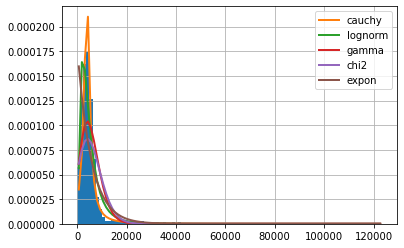

In [50]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.SEVERITY,
           distributions= get_common_distributions())
f.fit()
f.summary()